# Maximizing Revenue for Taxi Cab Drivers through Payment Type Hypothesis Analysis

# Problem statement

In fast paced taxi booking sector, maing the most of revenue is essential for long term success and driver happiness. Our goal is to use data-driver insights to maximise revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.

# Objective

This project's main goal is to run an A/B test to examine the relationship between the total fare and method of payment. We use python hypothesis testing and descriptive analysis to extract useful information that can help taxi drivers generate more cash. In particular, we want to find out if there is a big difference in the ares for those who pay with credit cards vserus those who with cash.

# Research Question

Is there a relationship between total fare amount and payment type and can we nudge customers towards payment methods that generate higher revenue for drivers, without negetively impacting customer experience?

Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')

Loading the dataset

In [3]:
df = pd.read_csv(r'C:/Users/shawa/OneDrive/Documents/yellow_tripdata_2023-12.csv')

In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2023-12-09 20:23:14.000000,2023-12-09 20:41:22.000000,1,1.31,1,N,48,237,1,16.3,1.0,0.5,2.00,0.0,1.0,23.30,2.5,0.0
1,1,2023-12-09 20:17:37.000000,2023-12-09 20:42:42.000000,2,2.80,1,N,233,114,1,21.9,3.5,0.5,5.00,0.0,1.0,31.90,2.5,0.0
2,1,2023-12-09 20:44:11.000000,2023-12-09 21:06:42.000000,2,1.80,1,N,114,107,1,19.1,3.5,0.5,6.00,0.0,1.0,30.10,2.5,0.0
3,1,2023-12-09 20:49:40.000000,2023-12-09 21:31:14.000000,3,3.10,1,N,229,48,1,26.8,3.5,0.5,5.00,0.0,1.0,36.80,2.5,0.0
4,1,2023-12-09 20:18:25.000000,2023-12-09 20:35:39.000000,1,1.50,1,N,234,158,1,14.2,3.5,0.5,3.85,0.0,1.0,23.05,2.5,0.0


# Exploratory Data Analysis

In [5]:
df.shape

(3376567, 19)

In [6]:
df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count           object
trip_distance            float64
RatecodeID                object
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge      object
Airport_fee               object
dtype: object

In [7]:
distinct_value = df['payment_type'].value_counts()
print(distinct_value)

payment_type
1    2574582
2     546481
0     180003
4      53196
3      22305
Name: count, dtype: int64


Since we are just using Cash and Credit Card in our hypothesis testing, dropping the other payment types to make the dataset smaller.

In [8]:
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [9]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

In [10]:
df['duration'] = df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']

In [11]:
print(df['duration'].dtype)

timedelta64[ns]


In [12]:
df['duration'] = df['duration'].dt.total_seconds()/60

In [13]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration
0,2,2023-12-09 20:23:14,2023-12-09 20:41:22,1,1.31,1,N,48,237,1,16.3,1.0,0.5,2.00,0.00,1.0,23.30,2.5,0.0,18.133333
1,1,2023-12-09 20:17:37,2023-12-09 20:42:42,2,2.80,1,N,233,114,1,21.9,3.5,0.5,5.00,0.00,1.0,31.90,2.5,0.0,25.083333
2,1,2023-12-09 20:44:11,2023-12-09 21:06:42,2,1.80,1,N,114,107,1,19.1,3.5,0.5,6.00,0.00,1.0,30.10,2.5,0.0,22.516667
3,1,2023-12-09 20:49:40,2023-12-09 21:31:14,3,3.10,1,N,229,48,1,26.8,3.5,0.5,5.00,0.00,1.0,36.80,2.5,0.0,41.566667
4,1,2023-12-09 20:18:25,2023-12-09 20:35:39,1,1.50,1,N,234,158,1,14.2,3.5,0.5,3.85,0.00,1.0,23.05,2.5,0.0,17.233333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3376562,1,2023-12-31 11:34:05,2023-12-31 11:41:34,1,1.40,1,N,163,141,1,8.6,2.5,0.5,2.50,0.00,1.0,15.10,2.5,0.0,7.483333
3376563,2,2023-12-31 11:42:39,2023-12-31 12:09:05,2,7.33,1,N,236,129,2,35.2,0.0,0.5,0.00,0.00,1.0,39.20,2.5,0.0,26.433333
3376564,2,2023-12-31 11:31:25,2023-12-31 11:43:47,1,7.95,1,N,138,170,1,30.3,5.0,0.5,9.25,6.94,1.0,57.24,2.5,1.75,12.366667
3376565,2,2023-12-31 11:52:21,2023-12-31 12:14:42,1,8.01,1,N,161,34,1,35.2,0.0,0.5,11.76,0.00,1.0,50.96,2.5,0.0,22.350000


In [14]:
df = df[['passenger_count', 'payment_type' , 'fare_amount' , 'trip_distance','duration']]

In [15]:
print(df['passenger_count'].unique())

[1 2 3 0 4 5 6 8 7 9 '2' '6' '1' '4' '3' '0' '5' '9' '\\N']


In [16]:
df['passenger_count'] = df['passenger_count'].replace('\\N', np.nan)

In [17]:
df.dropna(inplace=True)

In [18]:
df['passenger_count'] = df['passenger_count'].astype('int64')

In [19]:
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
1596,1,1,7.2,1.13,4.416667
1966,1,1,5.8,0.67,3.433333
2445,1,1,8.6,0.73,7.866667
2672,2,1,7.9,1.19,5.533333
2701,1,1,3.0,0.00,0.266667
...,...,...,...,...,...
3376552,0,1,10.0,1.50,7.283333
3376557,2,1,7.2,1.09,3.733333
3376560,2,1,7.2,0.95,4.800000
3376562,1,1,8.6,1.40,7.483333


In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df['passenger_count'].value_counts(normalize=True)

passenger_count
1    0.649563
2    0.198853
3    0.061245
4    0.043118
5    0.018531
0    0.017177
6    0.011480
8    0.000022
7    0.000008
9    0.000002
Name: proportion, dtype: float64

In [22]:
df['payment_type'].value_counts(normalize=True)

payment_type
1    0.752322
2    0.215280
4    0.023552
3    0.008845
Name: proportion, dtype: float64

In [23]:
df = df[df['payment_type']<3]
df = df[(df['passenger_count']>0) & (df['passenger_count']<7)]

In [24]:
df.shape

(1967986, 5)

In [25]:
df['payment_type'] = df['payment_type'].astype('int64')

In [26]:
df['payment_type'].replace([1,2],['Card','Cash'], inplace=True)

In [27]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,1.967986e+06,1.967986e+06,1.967986e+06,1.967986e+06
mean,1.598106e+00,2.504300e+01,4.599192e+00,2.326197e+01
std,1.049261e+00,2.089981e+01,1.210283e+02,4.949100e+01
min,1.000000e+00,-7.000000e+02,0.000000e+00,-3.878333e+01
25%,1.000000e+00,1.210000e+01,1.350000e+00,1.106667e+01
50%,1.000000e+00,1.840000e+01,2.400000e+00,1.790000e+01
75%,2.000000e+00,3.030000e+01,5.090000e+00,2.770000e+01
max,6.000000e+00,2.194700e+03,1.617261e+05,7.188317e+03


In [28]:
df = df[df['fare_amount']>0]
df = df[df['trip_distance']>0]
df = df[df['duration']>0]

In [29]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,1.942075e+06,1.942075e+06,1.942075e+06,1.942075e+06
mean,1.598875e+00,2.512719e+01,4.643262e+00,2.335819e+01
std,1.050576e+00,2.021042e+01,1.218316e+02,4.923090e+01
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,1.210000e+01,1.380000e+00,1.118333e+01
50%,1.000000e+00,1.840000e+01,2.440000e+00,1.798333e+01
75%,2.000000e+00,3.030000e+01,5.140000e+00,2.775000e+01
max,6.000000e+00,2.194700e+03,1.617261e+05,5.411000e+03


In [30]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,16.3,1.31,18.133333
1,2,Card,21.9,2.80,25.083333
2,2,Card,19.1,1.80,22.516667
3,3,Card,26.8,3.10,41.566667
4,1,Card,14.2,1.50,17.233333
...,...,...,...,...,...
3376559,2,Card,11.4,1.91,8.466667
3376561,1,Cash,11.4,1.80,12.016667
3376563,2,Cash,35.2,7.33,26.433333
3376564,1,Card,30.3,7.95,12.366667


{'whiskers': [<matplotlib.lines.Line2D at 0x17115bd72f0>,
 'caps': [<matplotlib.lines.Line2D at 0x17115bd77a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17115bd7020>],
 'medians': [<matplotlib.lines.Line2D at 0x17115bd7da0>],
 'fliers': [<matplotlib.lines.Line2D at 0x170d4b14080>],
 'means': []}

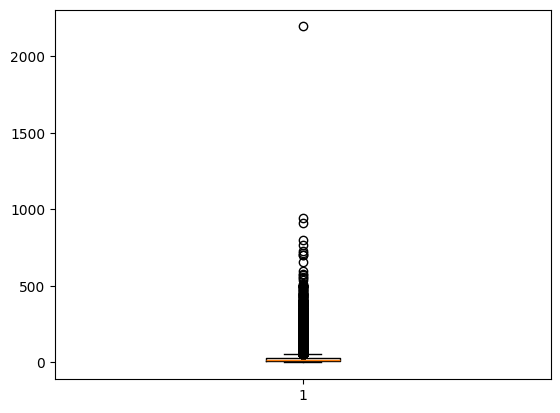

In [31]:
plt.boxplot(df['fare_amount'])

In [32]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,16.3,1.31,18.133333
1,2,Card,21.9,2.80,25.083333
2,2,Card,19.1,1.80,22.516667
3,3,Card,26.8,3.10,41.566667
4,1,Card,14.2,1.50,17.233333
...,...,...,...,...,...
3376559,2,Card,11.4,1.91,8.466667
3376561,1,Cash,11.4,1.80,12.016667
3376563,2,Cash,35.2,7.33,26.433333
3376564,1,Card,30.3,7.95,12.366667


In [33]:
for col in ['fare_amount', 'trip_distance', 'duration']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1

    lower_bound = q1-1.5*IQR
    upper_bound = q3+1.5*IQR

    df = df[(df[col]>=lower_bound)&(df[col]<=upper_bound)]

In [34]:
df.head

<bound method NDFrame.head of          passenger_count payment_type  fare_amount  trip_distance   duration
0                      1         Card         16.3           1.31  18.133333
1                      2         Card         21.9           2.80  25.083333
2                      2         Card         19.1           1.80  22.516667
4                      1         Card         14.2           1.50  17.233333
5                      1         Card         14.9           1.70  16.933333
...                  ...          ...          ...            ...        ...
3376555                1         Card         16.3           1.76  15.300000
3376558                2         Card         11.4           1.87   9.550000
3376559                2         Card         11.4           1.91   8.466667
3376561                1         Cash         11.4           1.80  12.016667
3376563                2         Cash         35.2           7.33  26.433333

[1555152 rows x 5 columns]>

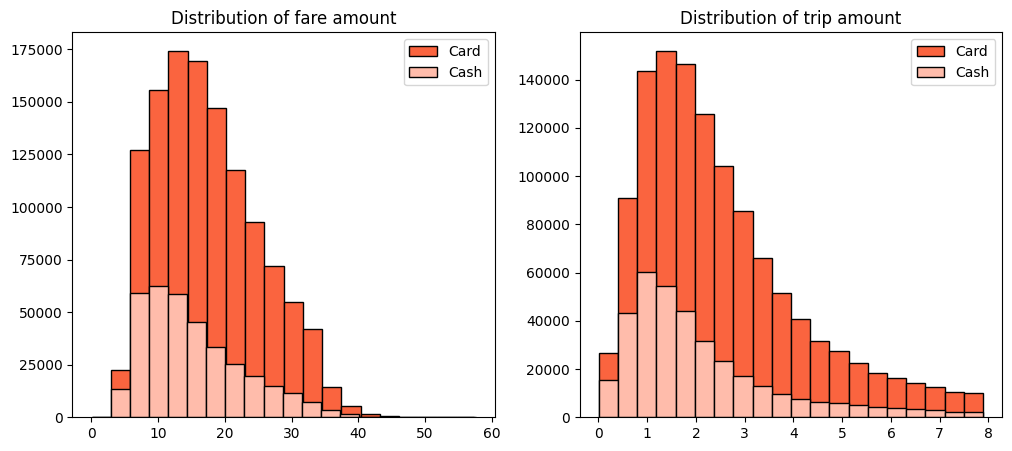

In [35]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1) 
plt.title('Distribution of fare amount')
plt.hist(df[df['payment_type']=='Card']['fare_amount'],histtype='barstacked', bins=20, edgecolor = 'k', color = '#FA643F', label ='Card')
plt.hist(df[df['payment_type']=='Cash']['fare_amount'],histtype='barstacked', bins=20, edgecolor = 'k', color = '#FFBCAB' , label = 'Cash')
plt.legend()

plt.subplot(1,2,2) 
plt.title('Distribution of trip amount')
plt.hist(df[df['payment_type']=='Card']['trip_distance'],histtype='barstacked', bins=20, edgecolor = 'k', color = '#FA643F', label ='Card')
plt.hist(df[df['payment_type']=='Cash']['trip_distance'],histtype='barstacked', bins=20, edgecolor = 'k', color = '#FFBCAB' , label = 'Cash')
plt.legend()

plt.show()

In [36]:
df.groupby('payment_type').agg({'fare_amount':['mean','std'], 'trip_distance':['mean','std']})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           17.542229  7.627195      2.498521  1.633542
Cash           15.356128  7.457010      2.089115  1.570565

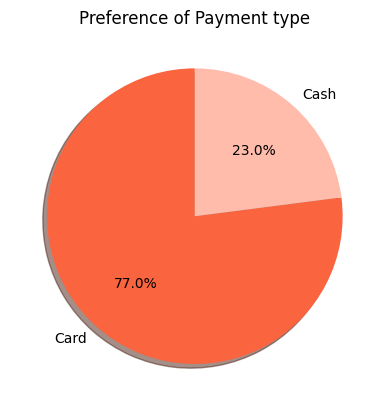

In [37]:
plt.title('Preference of Payment type')
plt.pie(df['payment_type'].value_counts(normalize=True),labels = df['payment_type'].value_counts().index, startangle =90, shadow= True, autopct = '%1.1f%%', colors = ['#FA643F','#FFBCAB'])
plt.show()

Null Hypothsis: There is no difference in average fare between customers who use credit card and customers who use cash.

Alternative Hypothsis: There is a difference in average fare between customers who use credit card and customers who use cash.

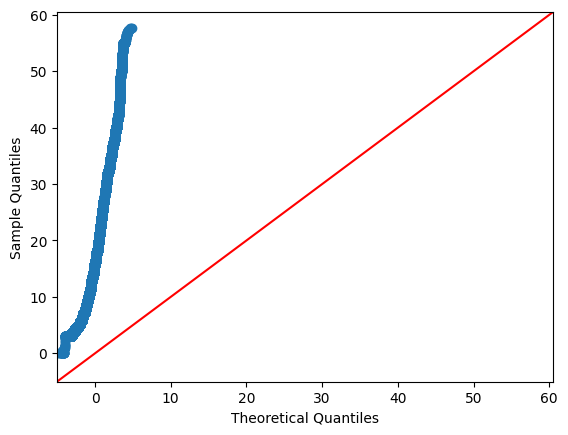

In [38]:
sm.qqplot(df['fare_amount'],line='45')
plt.show()

In [39]:
card_sample=df[df['payment_type']=='Card']['fare_amount']
cash_sample=df[df['payment_type']=='Cash']['fare_amount']

In [40]:
t_stats, p_value = st.ttest_ind(a=card_sample, b=cash_sample, equal_var=False)
print('T statitic', t_stats, 'p_value', p_value)

T statitic 152.9609345425821 p_value 0.0


In [41]:
pass_count = df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
pass_count

passenger_count
payment_type passenger_count                 
Card         1                         778350
             2                         245965
             3                          79614
             4                          50059
             5                          27226
             6                          16794
Cash         1                         236643
             2                          68383
             3                          22480
             4                          19642
             5                           6112
             6                           3884

In [42]:
pass_count.rename(columns={'passenger_count':'count'},inplace=True)
pass_count.reset_index(inplace=True)

In [43]:
pass_count['perc']=(pass_count['count']/pass_count['count'].sum())*100
pass_count

,payment_type,passenger_count,count,perc
0,Card,1,778350,50.049770
1,Card,2,245965,15.816139
2,Card,3,79614,5.119371
3,Card,4,50059,3.218914
4,Card,5,27226,1.750697
5,Card,6,16794,1.079894
6,Cash,1,236643,15.216712
7,Cash,2,68383,4.397191
8,Cash,3,22480,1.445518
9,Cash,4,19642,1.263028


In [44]:
df = pd.DataFrame(columns = ['payment_type',1,2,3,4,5])
df['payment_type'] = ['Card', 'Cash']
df.iloc[0,1:] = pass_count.iloc[0:5,-1]
df.iloc[1,1:] = pass_count.iloc[5,-1]
df

,payment_type,1,2,3,4,5
0,Card,50.04977,15.816139,5.119371,3.218914,1.750697
1,Cash,1.079894,1.079894,1.079894,1.079894,1.079894


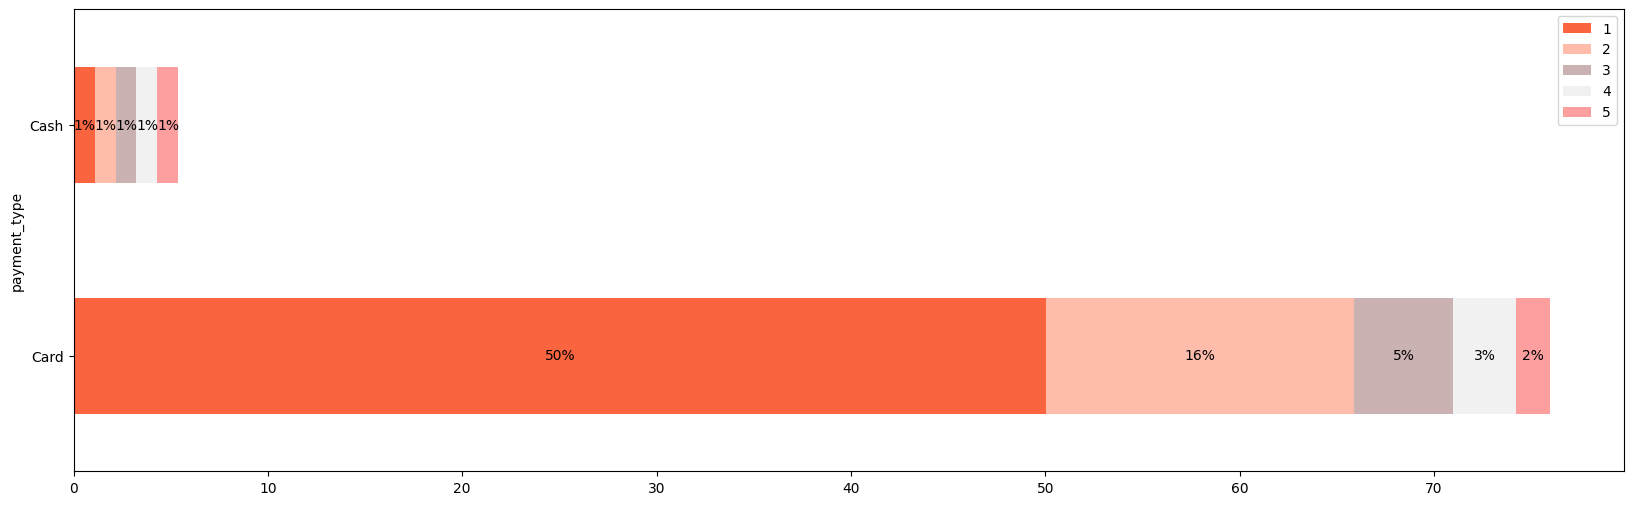

In [45]:
fig,ax = plt.subplots(figsize=(20,6))
df.plot(x='payment_type',kind = 'barh',stacked=True, ax=ax, color=['#FA643F','#FFBCAB','#CBB2B2','#F1F1F1', '#FD9F9F'])

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x,y = p.get_xy()
    ax.text(x + width /2, 
            y + height /2, 
            '{:.0f}%'.format(width),
            horizontalalignment='center', 
            verticalalignment='center')